<a href="https://colab.research.google.com/github/MarioAvolio/Amazon-Fine-Foods-reviews-Transformers-Text-Classification/blob/main/Text_Classification_Amazon_Food_with_other_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credits
- https://www.oreilly.com/library/view/practical-natural-language/9781492054047/

In [115]:
import pandas as pd
import os
import matplotlib.pyplot as plt # plotting
import numpy as np

In [116]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [117]:
import nltk
#https://www.nltk.org/

#NLTK is a leading platform for building Python programs to work with human language data. 
#It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
#along with a suite of text processing libraries for classification, tokenization, 
#stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength 
#NLP libraries, and an active discussion forum.

nltk.download('punkt') 

nltk.download('stopwords')
# Downloading stop words from NLTK nltk.download ('stopwords')


from nltk.tokenize import word_tokenize
#Tokenizers divide strings into lists of substrings. For example, tokenizers can 
#be used to find the words and punctuation in a string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Constants and Methods

In [118]:
PATH_PROJ = "/content/drive/MyDrive/data-proj/"
# if not os.path.exists(PATH_PROJ):
#   PATH_PROJ = "/content/drive/MyDrive/shared/data-proj/"

PATH_DATASET = PATH_PROJ+"food.csv"

In [119]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Number of sentences')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Pipeline

We would normally
walk through the requirements and break the problem down into several subproblems, then try to develop a step-by-step procedure to solve them. Since language
processing is involved, we would also list all the forms of text processing needed at
each step. This step-by-step processing of text is known as a pipeline. It is the series of
steps involved in building any NLP model. These steps are common in every NLP
project

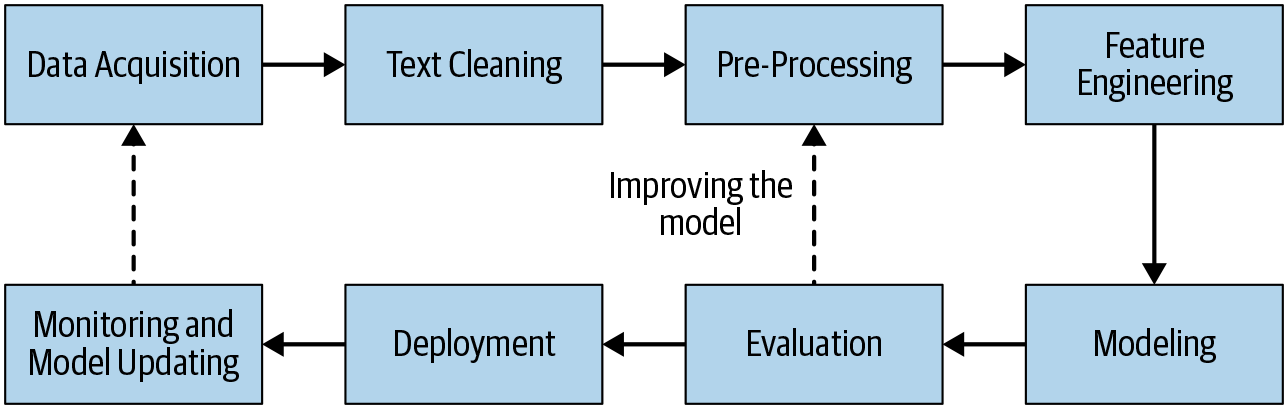

The first step in the process of developing any NLP system is to collect data relevant
to the given task. Even if we’re building a rule-based system, we still need some data
to design and test our rules. The data we get is seldom clean, and this is where text
cleaning comes into play. After cleaning, text data often has a lot of variations and
needs to be converted into a canonical form. This is done in the pre-processing step.
This is followed by feature engineering, where we carve out indicators that are most
suitable for the task at hand. These indicators are converted into a format that is
understandable by modeling algorithms. Then comes the modeling and evaluation
phase, where we build one or more models and compare and contrast them using a
relevant evaluation metric(s). Once the best model among the ones evaluated is
chosen, we move toward deploying this model in production. Finally, we regularly
monitor the performance of the model and, if need be, update it to keep up its
performance.


# Data 

In [120]:
df = pd.read_csv(PATH_DATASET)

In [121]:

df

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2.0,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,Great taffy at a great price. There was a wid...
...,...,...,...,...
35167,B000E1DSQS,A2QG0Z96HULRW7,5.0,"Once I tasted Hazelnut coffee, I was hooked! N..."
35168,B000E1DSQS,A3F653OGB0ZF4X,5.0,Has Maxwell House quit making this coffee? I ...
35169,B000E1DSQS,AJD41FBJD9010,5.0,"Nutty, smooth, subtle, with a WONDERFUL aroma-..."
35170,B000E1DSQS,A33R5P618X7MG7,5.0,Price was right and the taste very good. We w...


In [122]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(35172, 4)


In [123]:
print(df.columns)

Index(['productid', 'userid', 'score', 'text'], dtype='object')


In [124]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 35172 rows and 4 columns


In [125]:
df.head(6)

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2.0,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,ADT0SRK1MGOEU,4.0,I got a wild hair for taffy and ordered this f...


Let's isolate the useful columns to our end. 

In [126]:
df = df[["text","score"]]

In [127]:
df.iloc[30:40]

,text,score
30,"I have never been a huge coffee fan. However, ...",5.0
31,"This offer is a great price and a great taste,...",5.0
32,McCann's Instant Oatmeal is great if you must ...,4.0
33,This is a good instant oatmeal from the best o...,4.0
34,Instant oatmeal can become soggy the minute th...,5.0
35,"McCann's Instant Irish Oatmeal, Variety Pack o...",4.0
36,For those of us with celiac disease this produ...,5.0
37,"What else do you need to know? Oatmeal, instan...",5.0
38,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,4.0
39,I ordered this for my wife as it was reccomend...,5.0


## Looking at the Class Distribution


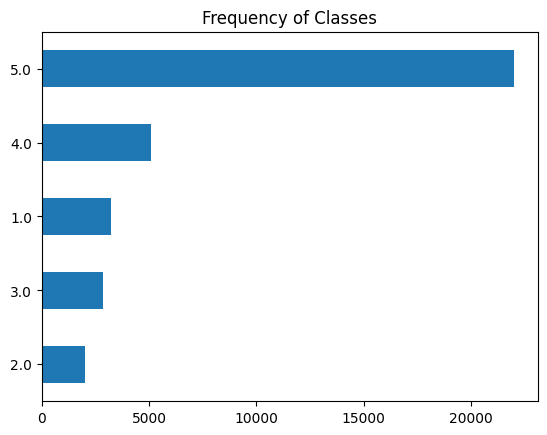

In [128]:
import matplotlib.pyplot as plt
df["score"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In this case, we can see that the dataset is heavily imbalanced; There are several ways to deal with imbalanced data, including:
- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.

## How Long Are Our Review?
Transformer models have a maximum input sequence length that is referred to as the
maximum context size. For applications using DistilBERT, the maximum context size
is 512 tokens, which amounts to a few paragraphs of text. 

<ipython-input-129-bd572601d4ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Words Per Review"] = df["text"].str.split().apply(len)


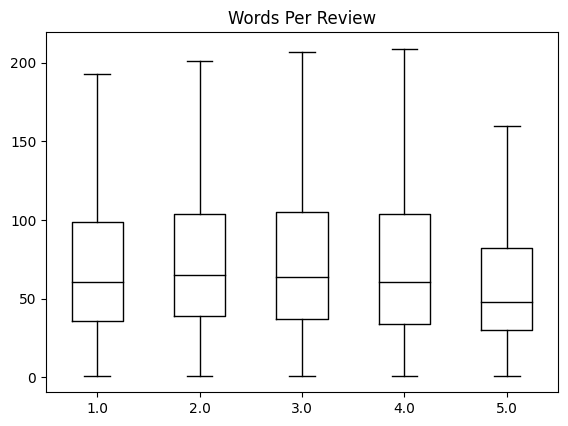

In [129]:
df["Words Per Review"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Review", by="score", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

From the plot we see that for each emotion, most tweets are around 60 words long
and the longest tweets are well below DistilBERT’s maximum context size. Texts that
are longer than a model’s context size need to be truncated, which can lead to a loss in
performance if the truncated text contains crucial information; in this case, it looks
like that won’t be an issue.

Map target label to String
1. VERY NEGATIVE
2. NEGATIVE
3. NEUTRAL
4. POSITIVE
5. EXCELLENT


# Text Extraction and Cleanup
Text extraction and cleanup refers to the process of extracting raw text from the input
data by removing all the other non-textual information, such as markup, metadata,
etc., and converting the text to the required encoding format

In [130]:
from bs4 import BeautifulSoup

def clean_html_tags(row):
  soupified = BeautifulSoup(row, "html.parser")
  for linebreak in soupified.find_all('br'): #remove br
    linebreak.replace_with(" ")

  span_tags = soupified.find_all('span') # remove span
  for span in span_tags:
      span.unwrap()
  
  # string = str(str(soupified).encode("utf-8"))
  # return str(string(soupified).replace("&lt;a href=\"http\'","").replace("..."," "))
  stri = str(str(soupified).replace("a href=\"http\'","").replace("..."," ")).replace("<a href=\"http","")
  return str(str(stri).encode("utf-8")).replace("\\;&lt\;;xefxbfxbd;\xef\xbf\xbdt","").replace("&amp\;","&")
 # return str(str(soupified).encode("utf-8")).replace("&lt;a href=\"http\'","") # utf-8 conversion

In [131]:
for i in range(90):
  print(df.text.iloc[i])
  print(clean_html_tags(df.text.iloc[i]))
  

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
b'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
b'Product arrived labeled as Jumbo Salted Peanuts the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'
This is a confection that has been around a few centuries.  It is a light, pillowy cit

<ipython-input-130-859bd3fc9381>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")


In [132]:
df['text'] = df['text'].apply(clean_html_tags)

<ipython-input-130-859bd3fc9381>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")
<ipython-input-130-859bd3fc9381>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")
<ipython-input-130-859bd3fc9381>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")
<ipython-input-130-859bd3fc9381>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")
<ipython-input-130-859bd3fc9381>:4: 

In [133]:
df

,text,score,Words Per Review
0,b'I have bought several of the Vitality canned...,5.0,48
1,b'Product arrived labeled as Jumbo Salted Pean...,1.0,31
2,b'This is a confection that has been around a ...,4.0,94
3,b'If you are looking for the secret ingredient...,2.0,41
4,b'Great taffy at a great price. There was a w...,5.0,27
...,...,...,...
35167,"b""Once I tasted Hazelnut coffee, I was hooked!...",5.0,56
35168,"b""Has Maxwell House quit making this coffee? ...",5.0,24
35169,"b""Nutty, smooth, subtle, with a WONDERFUL arom...",5.0,52
35170,b'Price was right and the taste very good. We...,5.0,26


In [134]:
# df.to_csv(PATH_PREPROCESSED_DATASET, index=False)

## Spelling Correction
In the world of fast typing and fat-finger typing, incoming text data often has
spelling errors. This can be prevalent in search engines, text-based chatbots deployed
on mobile devices, social media, and many other sources. While we remove HTML
tags and handle Unicode characters, this remains a unique problem that may hurt the
linguistic understanding of the data, and shorthand text messages in social micro‐
blogs often hinder language processing and context understanding

from: https://learn.microsoft.com/en-us/bing/search-apis/bing-spell-check/overview

In [135]:
import requests
import json

In [136]:
def spelling_correction(example_text):
  api_key = "b104cefaeaf14858b97b8823375f53c7"  # TODO: Davide prova a far funzionare questo, segui le indicazioni qui https://learn.microsoft.com/en-us/bing/search-apis/bing-spell-check/overview
  example_text = "Hollo, wrld"
  endpoint = "https://api.bing.microsoft.com/v7.0/spellcheck?"

  # Create a new dictionary with text as the key, and your text as the value.
  data = {'text': example_text}

  # Add the parameters for your request:
  #   a. Assign your market code to the mkt parameter with the = operator. The market code is the code of the country/region you make the request from.
  #   b. Add the mode parameter with the & operator, and then assign the spell-check mode. The mode can be either proof (catches most spelling/grammar errors) or spell (catches most spelling errors, but not as many grammar errors).

  params = {
    'mkt':'en-us',
    'mode':'proof'
    }

  # Add a Content-Type header and your subscription key to the Ocp-Apim-Subscription-Key header.
  headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Ocp-Apim-Subscription-Key': api_key,
    }

  # Send the POST request by using the requests library.
  response = requests.post(endpoint, headers=headers, params=params, data=data)

  # Get the JSON response
  json_response = response.json()
  print(json.dumps(json_response, indent=4))
  return json.dumps(json_response, indent=4)
  

In [137]:
spelling_correction(df.text.iloc[10])

{
    "error": {
        "code": "401",
        "message": "Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource."
    }
}


'{\n    "error": {\n        "code": "401",\n        "message": "Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource."\n    }\n}'

# Pre-Processing
Our text-extraction step removed all this and gave us the plain text of the
article we need. However, all NLP software typically works at the sentence level and
expects a separation of words at the minimum. So, we need some way to split a text
into words and sentences before proceeding further in a processing pipeline. Some‐
times, we need to remove special characters and digits, and sometimes, we don’t care
whether a word is in upper or lowercase and want everything in lowercase. Many
more decisions like this are made while processing text. Such decisions are addressed
during the pre-processing step of the NLP pipeline. Here are some common preprocessing steps used in NLP software:

- Preliminaries: Sentence segmentation and word tokenization.
- Frequent steps: Stop word removal, stemming and lemmatization, removing digits/punctuation,
lowercasing, etc.
- Other steps: Normalization, language detection, code mixing, transliteration, etc.
- Advanced processing: POS tagging, parsing, coreference resolution, etc.

## Preliminaries

As mentioned earlier, NLP software typically analyzes text by breaking it up into
words (tokens) and sentences. Hence, any NLP pipeline has to start with a reliable
system to split the text into sentences (sentence segmentation) and further split a sentence into words (word tokenization)

### Sentence segmentation

As a simple rule, we can do sentence segmentation by breaking up text into sentences
at the appearance of full stops and question marks. However, there may be abbrevia‐
tions, forms of addresses (Dr., Mr., etc.), or ellipses (...) that may break the simple
rule.

In [138]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [139]:
df.text.iloc[4]

"b'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'"

In [140]:
sent_tokenize(df.text.iloc[4])

["b'Great taffy at a great price.",
 'There was a wide assortment of yummy taffy.',
 'Delivery was very quick.',
 "If your a taffy lover, this is a deal.'"]

In [141]:
df.text = df.text.apply(sent_tokenize)

<ipython-input-141-567c2ed03fd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(sent_tokenize)


### Word tokenization
While readily available solutions work for most of our needs and most NLP libraries
will have a tokenizer and sentence splitter bundled with them, it’s important to
remember that they’re far from perfect. For example, consider this sentence: “Mr. Jack
O’Neil works at Melitas Marg, located at 245 Yonge Avenue, Austin, 70272.” If we run
this through the NLTK tokenizer, O, ‘, and Neil are identified as three separate tokens.
Similarly, if we run the sentence: “There are \$10,000 and €1000 which are there just
for testing a tokenizer” through this tokenizer, while $ and 10,000 are identified as
separate tokens, €1000 is identified as a single token. In another scenario, if we want
to tokenize tweets, this tokenizer will separate a hashtag into two tokens: a “#” sign
and the string that follows it. In such cases, we may need to use a custom tokenizer
built for our purpose

In [142]:
def word_tokenize_custom(list_of_sent):
  list_of_word = []
  for sent in list_of_sent:
    list_of_word.extend(word_tokenize(sent))

  return list_of_word

In [143]:
df.text.iloc[4]

["b'Great taffy at a great price.",
 'There was a wide assortment of yummy taffy.',
 'Delivery was very quick.',
 "If your a taffy lover, this is a deal.'"]

In [144]:
word_tokenize_custom(df.text.iloc[4])

["b'Great",
 'taffy',
 'at',
 'a',
 'great',
 'price',
 '.',
 'There',
 'was',
 'a',
 'wide',
 'assortment',
 'of',
 'yummy',
 'taffy',
 '.',
 'Delivery',
 'was',
 'very',
 'quick',
 '.',
 'If',
 'your',
 'a',
 'taffy',
 'lover',
 ',',
 'this',
 'is',
 'a',
 'deal',
 '.',
 "'"]

In [145]:
df.text = df.text.apply(word_tokenize_custom) # TODO: da migliroare

<ipython-input-145-6dce8133e54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(word_tokenize_custom) # TODO: da migliroare


## Frequent Steps
Some of
the frequently used words in English, such as a, an, the, of, in, etc., are not particularly useful for this task, as they don’t carry any content on their own to separate
between the four categories. Such words are called stop words and are typically
(though not always) removed from further analysis in such problem scenarios. There
is no standard list of stop words for English, though. There are some popular lists
(NLTK has one, for example), although what a stop word is can vary depending on what we’re working on.

Similarly, in some cases, upper or lowercase may not make a difference for the problem. So, all text is lowercased (or uppercased, although lowercasing is more common). Removing punctuation and/or numbers is also a common step for many NLP
problems, such as text classification, information retrieval,
and social media analytics


In [146]:
from nltk.corpus import stopwords
from string import punctuation
 
def preprocess_corpus(texts):
  '''
  Remove stop words, digits, and punctuation and lowercase a given collection of texts
  '''
  mystopwords = set(stopwords.words("english"))
  
  def remove_stops_digits(tokens):
    return [token.lower() for token in tokens if token not in mystopwords and not token.isdigit() and token not in punctuation]
  
  return [remove_stops_digits(text) for text in texts]
  # TODO: this method doesn't remove the points '.'! pls check and fix!



In [147]:
df.text.iloc[4]

["b'Great",
 'taffy',
 'at',
 'a',
 'great',
 'price',
 '.',
 'There',
 'was',
 'a',
 'wide',
 'assortment',
 'of',
 'yummy',
 'taffy',
 '.',
 'Delivery',
 'was',
 'very',
 'quick',
 '.',
 'If',
 'your',
 'a',
 'taffy',
 'lover',
 ',',
 'this',
 'is',
 'a',
 'deal',
 '.',
 "'"]

In [148]:
preprocess_corpus(df.text.iloc[4])

[['b', 'g', 'r', 'e'],
 ['f', 'f'],
 [],
 [],
 ['g', 'r', 'e'],
 ['p', 'r', 'c', 'e'],
 [],
 ['t', 'h', 'e', 'r', 'e'],
 ['w'],
 [],
 ['w', 'e'],
 ['r', 'e', 'n'],
 ['f'],
 ['u'],
 ['f', 'f'],
 [],
 ['d', 'e', 'l', 'v', 'e', 'r'],
 ['w'],
 ['v', 'e', 'r'],
 ['q', 'u', 'c', 'k'],
 [],
 ['i', 'f'],
 ['u', 'r'],
 [],
 ['f', 'f'],
 ['l', 'v', 'e', 'r'],
 [],
 ['h'],
 [],
 [],
 ['e', 'l'],
 [],
 []]

In [149]:
# df.text = df.text.apply(preprocess_corpus)

### Stemming and lemmatization

Stemming refers to the process of removing suffixes and reducing a word to some
base form such that all different variants of that word can be represented by the same form (e.g., “car” and “cars” are both reduced to “car”). This is accomplished by applying a fixed set of rules (e.g., if the word ends in “-es,” remove “-es”). Although such rules may not always end up in a linguistically correct base form, stemming is commonly used in search engines to match user queries to relevant documents and in text classification to reduce the feature space to train machine learning models.


Lemmatization is the process of mapping all the different forms of a word to its base
word, or lemma. While this seems close to the definition of stemming, they are, in
fact, different. For example, the adjective “better,” when stemmed, remains the same.
However, upon lemmatization, this should become “good.

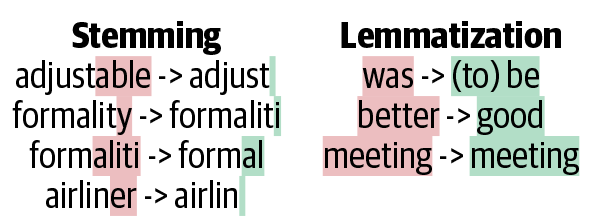

In [150]:
from nltk.stem.porter import PorterStemmer

def make_stemming(sent):
  stemmer = PorterStemmer()
  stemmed_sentence = []
  for word in sent:
    stemmed_word = stemmer.stem(word)
    stemmed_sentence.append(stemmed_word)
  
  return stemmed_sentence

In [151]:
df.text.iloc[4]

["b'Great",
 'taffy',
 'at',
 'a',
 'great',
 'price',
 '.',
 'There',
 'was',
 'a',
 'wide',
 'assortment',
 'of',
 'yummy',
 'taffy',
 '.',
 'Delivery',
 'was',
 'very',
 'quick',
 '.',
 'If',
 'your',
 'a',
 'taffy',
 'lover',
 ',',
 'this',
 'is',
 'a',
 'deal',
 '.',
 "'"]

In [152]:
make_stemming(df.text.iloc[4])

["b'great",
 'taffi',
 'at',
 'a',
 'great',
 'price',
 '.',
 'there',
 'wa',
 'a',
 'wide',
 'assort',
 'of',
 'yummi',
 'taffi',
 '.',
 'deliveri',
 'wa',
 'veri',
 'quick',
 '.',
 'if',
 'your',
 'a',
 'taffi',
 'lover',
 ',',
 'thi',
 'is',
 'a',
 'deal',
 '.',
 "'"]

In [153]:
df.text = df.text.apply(make_stemming)

<ipython-input-153-537e78d757aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(make_stemming)


In [154]:
import spacy

def make_lemmatization(sentence):
  sp = spacy.load('en_core_web_sm')

  list_of_lemmatize_words = []
  for word in sentence:
    token = sp(word) # The ‘u’ in front of a string means the string is a Unicode string.
    list_of_lemmatize_words.append(token[0].lemma_)
  
  return list_of_lemmatize_words

In [155]:
df.text.iloc[10]

['b',
 "''",
 'i',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactu',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the',
 'uniqu',
 'combin',
 'of',
 'ingredi',
 ',',
 'but',
 'the',
 'flavour',
 'of',
 'thi',
 'hot',
 'sauc',
 'make',
 'it',
 'one',
 'of',
 'a',
 'kind',
 '!',
 'we',
 'pick',
 'up',
 'a',
 'bottl',
 'onc',
 'on',
 'a',
 'trip',
 'we',
 'were',
 'on',
 'and',
 'brought',
 'it',
 'back',
 'home',
 'with',
 'us',
 'and',
 'were',
 'total',
 'blown',
 'away',
 '!',
 'when',
 'we',
 'realiz',
 'that',
 'we',
 'simpli',
 'could',
 "n't",
 'find',
 'it',
 'anywher',
 'in',
 'our',
 'citi',
 'we',
 'were',
 'bum',
 '.',
 'now',
 ',',
 'becaus',
 'of',
 'the',
 'magic',
 'of',
 'the',
 'internet',
 ',',
 'we',
 'have',
 'a',
 'case',
 'of',
 'the',
 'sauc',
 'and',
 'are',
 'ecstat',
 'becaus',
 'of',
 'it',
 '.',
 'if',
 'you',
 'love',
 'hot',
 'sauc',
 '..',
 'i',
 'mean',
 'realli',
 'love',
 'hot',
 'sauc',
 ',',
 'but',
 'do',
 "n't",
 'want',
 'a',
 'sauc',


In [156]:
make_lemmatization(df.text.iloc[10])

['b',
 "''",
 'I',
 'do',
 'not',
 'know',
 'if',
 'it',
 'be',
 'the',
 'cactu',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the',
 'uniqu',
 'combin',
 'of',
 'ingredi',
 ',',
 'but',
 'the',
 'flavour',
 'of',
 'thi',
 'hot',
 'sauc',
 'make',
 'it',
 'one',
 'of',
 'a',
 'kind',
 '!',
 'we',
 'pick',
 'up',
 'a',
 'bottl',
 'onc',
 'on',
 'a',
 'trip',
 'we',
 'be',
 'on',
 'and',
 'bring',
 'it',
 'back',
 'home',
 'with',
 'we',
 'and',
 'be',
 'total',
 'blow',
 'away',
 '!',
 'when',
 'we',
 'realiz',
 'that',
 'we',
 'simpli',
 'could',
 'not',
 'find',
 'it',
 'anywher',
 'in',
 'our',
 'citi',
 'we',
 'be',
 'bum',
 '.',
 'now',
 ',',
 'becaus',
 'of',
 'the',
 'magic',
 'of',
 'the',
 'internet',
 ',',
 'we',
 'have',
 'a',
 'case',
 'of',
 'the',
 'sauc',
 'and',
 'be',
 'ecstat',
 'becaus',
 'of',
 'it',
 '.',
 'if',
 'you',
 'love',
 'hot',
 'sauc',
 '..',
 'I',
 'mean',
 'realli',
 'love',
 'hot',
 'sauc',
 ',',
 'but',
 'do',
 'not',
 'want',
 'a',
 'sauc',
 'that',
 

In [157]:
#df.text = df.text.apply(make_lemmatization) # too much expensive

In [158]:
# df.to_csv(PATH_PREPROCESSED_DATASET, index=False)

# Model - Text Classification

The challenge of text classification is to “learn” this categorization from a
collection of examples for each of these categories and predict the categories for new,
unseen products and new customer reviews.

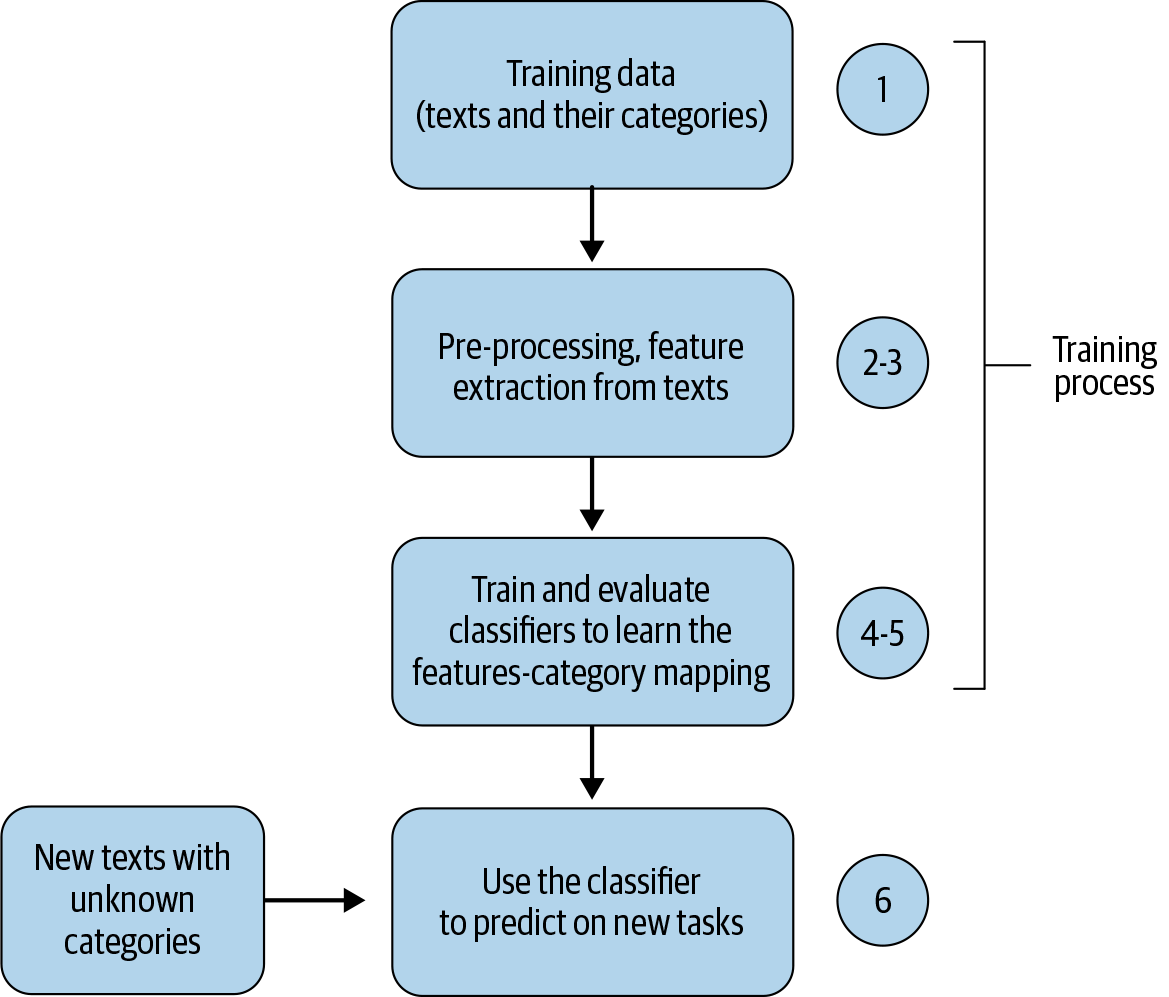

## A Simple Classifier Without the Text Classification Pipeline: lexicon-based sentiment analysis

The **AFINN** lexicon is a list of **English terms** manually rated for valence with an integer between -5 (negative) and +5 (positive) by Finn Årup Nielsen between 2009 and 2011.

https://arxiv.org/pdf/1103.2903.pdf


In [160]:
!pip install afinn
from afinn import Afinn
afinn = Afinn(emoticons=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
def apply_afinn(row):
  score = 0
  for word in row:
    score += afinn.score(word)

  return score

In [162]:
df['afinn'] = df["text"].apply(apply_afinn) #new attribute/column 
#check out how apply works

df[['score', 'afinn', 'text']].head(10)

,score,afinn,text
0,5.0,9.0,"[b, ', i, have, bought, sever, of, the, vital,..."
1,1.0,-2.0,"[b'product, arriv, label, as, jumbo, salt, pea..."
2,4.0,5.0,"[b'thi, is, a, confect, that, ha, been, around..."
3,2.0,3.0,"[b'if, you, are, look, for, the, secret, ingre..."
4,5.0,6.0,"[b'great, taffi, at, a, great, price, ., there..."
5,4.0,2.0,"[b, ', i, got, a, wild, hair, for, taffi, and,..."
6,5.0,6.0,"[b, '', thi, saltwat, taffi, had, great, flavo..."
7,5.0,5.0,"[b'thi, taffi, is, so, good, ., it, is, veri, ..."
8,5.0,3.0,"[b, '', right, now, i, 'm, mostli, just, sprou..."
9,5.0,6.0,"[b'thi, is, a, veri, healthi, dog, food, ., go..."


In [163]:
df.iloc[0]

text                [b, ', i, have, bought, sever, of, the, vital,...
score                                                             5.0
Words Per Review                                                   48
afinn                                                             9.0
Name: 0, dtype: object

In [164]:
df.afinn.value_counts() # df. column_name .value_counts()

 3.0     3211
 5.0     3062
 6.0     2925
 0.0     2583
 2.0     2508
         ... 
 65.0       1
 48.0       1
 47.0       1
 52.0       1
-21.0       1
Name: afinn, Length: 80, dtype: int64

In [165]:
#let's compute the range of afinn scores in this dataset

In [166]:
abs(min(df.afinn.value_counts().index.astype(int)) - max(df.afinn.value_counts().index.astype(int)))

104

In [167]:
#let's visualize the histogram of frequencies

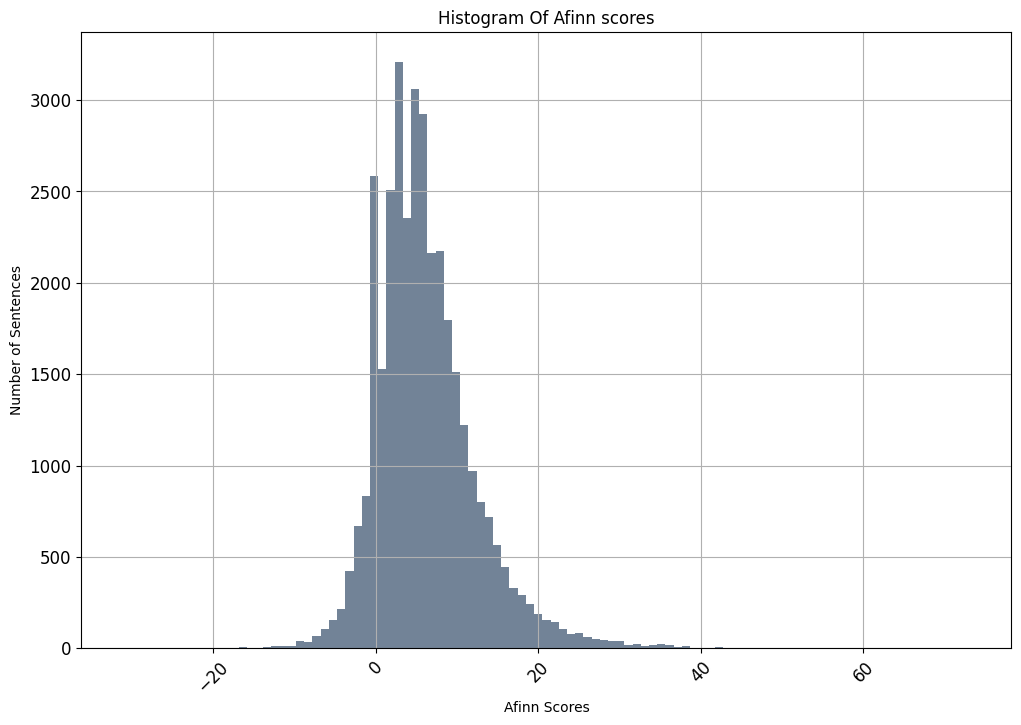

In [168]:
df.afinn.plot(kind='hist', #takes the column name as input
        alpha=0.7,
        bins = abs(min(df.afinn.value_counts().index.astype(int)) - max(df.afinn.value_counts().index.astype(int)))-1,
        title='Histogram Of Afinn scores',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=12, 
        color=['#364F6B'])
plt.xlabel('Afinn Scores')
plt.ylabel("Number of Sentences");

In [169]:
#let's check the distribution of sentiment values

In [170]:
df.score.value_counts() #df. column_name .value_counts()

5.0    22017
4.0     5071
1.0     3218
3.0     2860
2.0     2006
Name: score, dtype: int64

In [171]:
pd.crosstab(df.score, df.afinn) #confusion matrix

afinn,-31.0,-21.0,-19.0,-18.0,-17.0,-16.0,-15.0,-14.0,-13.0,-12.0,...,51.0,52.0,53.0,56.0,57.0,58.0,65.0,67.0,70.0,73.0
score,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,3,1,3,8,1,2,2,11,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4.0,0,0,0,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,1,3,1,...,3,0,2,0,1,1,1,1,1,1


In [172]:
#how can we compute a 3-class confusion matrix?
#positive (+1) neutral (0) negative (-1)

compute a 3-class confusion matrix 
- positive (+1) 
- neutral (0) 
- negative (-1)

In [173]:
# Compute 3-class confusion matrix
confusion = pd.crosstab(np.sign(df.score - 3), 
                        np.sign(df.afinn))
confusion

afinn,-1.0,0.0,1.0
score,,,
-1.0,1290,660,3274
0.0,277,300,2283
1.0,1044,1623,24421


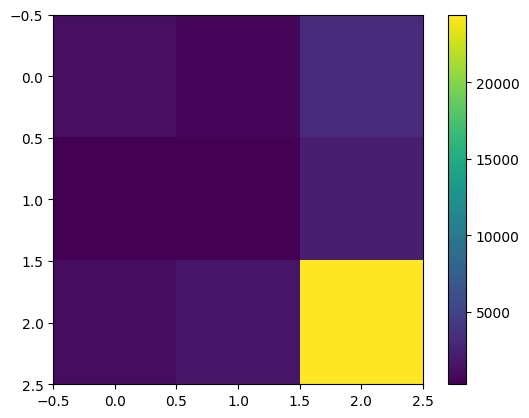

In [174]:
shw = plt.imshow(confusion)
bar = plt.colorbar(shw)

In [175]:
accuracy_3_class = np.sum(np.diag(confusion)) / np.sum(confusion.values)
accuracy_3_class

0.7395371318093938

 we compute a 2-class confusion matrix excluding neutral sentiments

In [176]:
# Compute 2-class confusion matrix
confusion_2_class = confusion.iloc[[0, 2], [0, 2]] #beware! 
confusion_2_class

afinn,-1.0,1.0
score,,
-1.0,1290,3274
1.0,1044,24421


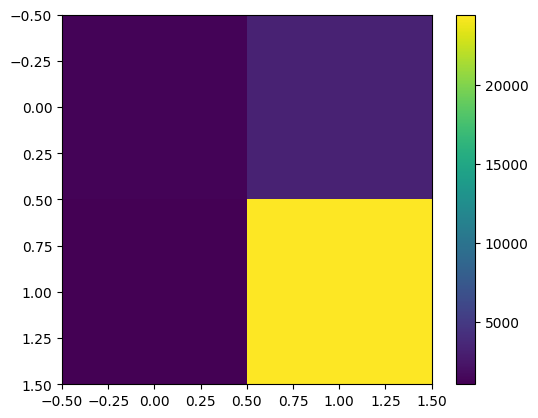

In [177]:
shw = plt.imshow(confusion_2_class)
bar = plt.colorbar(shw)

How much is the accuracy?

In [178]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.8562056678544074

Use as **baseline** the most frequent class: it gives better results

In [179]:
accuracy_2_class_baseline = confusion_2_class.sum().max() / np.sum(confusion_2_class.values)
accuracy_2_class_baseline

0.9222751340370975

### Custom lexicon


In [180]:
!git clone https://github.com/mhbashari/NRC-Persian-Lexicon
!mv "/content/NRC-Persian-Lexicon/NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx" "/content/NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx"

fatal: destination path 'NRC-Persian-Lexicon' already exists and is not an empty directory.
mv: cannot stat '/content/NRC-Persian-Lexicon/NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx': No such file or directory


In [181]:
import pandas as pd
# import the lexicon
lexicon_df = pd.read_excel("NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx", engine="openpyxl")

#many languages
#8 emotion types
#https://github.com/sebastianruder/emotion_proposition_store/tree/master/NRC-Emotion-Lexicon-v0.92


#The NRC emotion lexicon is a list of words and their associations with
#eight emotions (anger, fear, anticipation, trust, surprise, sadness,
#joy, and disgust) and two sentiments (negative and positive). The
#annotations were manually done through Amazon's Mechanical Turk. Refer
#to publications below for more details: http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm 


lexicon_df.head(10)

,English Word,Arabic Translation (Google Translate),Basque Translation (Google Translate),Bengali Translation (Google Translate),Catalan Translation (Google Translate),Chinese (simplified) Translation (Google Translate),Chinese (traditional) Translation (Google Translate),Danish Translation (Google Translate),Dutch Translation (Google Translate),Esperanto Translation (Google Translate),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,الى الوراء,aback,পশ্চাতে,darrere,吓了一跳,嚇了一跳,overrasket,verrast,surprizita,...,0,0,0,0,0,0,0,0,0,0
1,abacus,طبلية تاج,abako,গণনা-যন্ত্রবিশেষ,àbac,算盘,算盤,abacus,abacus,abako,...,0,0,0,0,0,0,0,0,0,1
2,abandon,تخلى,alde batera utzi,বর্জিত করা,abandonar,放弃,放棄,opgive,verlaten,forlasos,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,مهجور,abandonatu,পরিত্যক্ত,abandonat,弃,棄,forladte,verlaten,forlasita,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,هجر,abandono,বিসর্জন,abandonament,放弃,放棄,opgivelse,verlatenheid,forlasas,...,0,1,1,0,0,1,0,1,1,0
5,abate,انحسر,abate,প্রকোপ হ্রাস করা,disminuir,杀,殺,aftage,verminderen,Abate,...,0,0,0,0,0,0,0,0,0,0
6,abatement,انحسار,murrizteko,উপশম,disminució,减排,減排,nedskæring,vermindering,abatement,...,0,0,0,0,0,0,0,0,0,0
7,abba,أبا,abba,Abba,abba,ABBA,ABBA,abba,abba,ABBA,...,1,0,0,0,0,0,0,0,0,0
8,abbot,رئيس الدير,abade,মঠাধ্যক্ষ,abat,方丈,方丈,abbed,abt,abato,...,0,0,0,0,0,0,0,0,0,1
9,abbreviate,اختصر,laburtu,খাট করা,abreujar,简略,簡略,forkorte,afkorten,mallongigi,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# create a dict mapping word to value
lexicon = {}

#https://www.w3schools.com/python/ref_func_zip.asp

for word, pos, neg in zip(lexicon_df["English Word"], lexicon_df["Positive"], lexicon_df["Negative"]):
  if pos:
    value = 1
  elif neg:
    value = -1 #i do not consider 0's 
  else:
    continue
  lexicon[str(word).lower()] = value #lower case

In [183]:
# this custom function will return the sentiment associated to a sentence via the sum of single words
def myscore(sentence):
  sentiment = 0
  for word in sentence: 
    sentiment += lexicon.get(word.lower()) if lexicon.get(word.lower()) is not None else 0 #+= operator
  return sentiment

In [184]:
# apply myscore function
df['myscore'] = df["text"].apply(myscore)
df[['score', 'afinn','myscore', 'text']].tail(30)

,score,afinn,myscore,text
35142,5.0,4.0,0,"[b, '', hi, buy, thi, oil, for, all, your, sti..."
35143,5.0,4.0,1,"[b'thi, peanut, oil, is, clear, odorless, high..."
35144,3.0,8.0,2,"[b, ', i, am, give, it, a, 3, star, review, be..."
35145,5.0,3.0,1,"[b, ', i, use, these, to, make, my, own, raw, ..."
35146,5.0,10.0,7,"[b, '', have, live, in, spain, for, almost, si..."
35147,3.0,18.0,10,"[b, '', these, cracker, are, made, by, back, t..."
35148,5.0,7.0,4,"[b'mi, son, is, absout, addict, to, these, thi..."
35149,5.0,12.0,7,"[b, '', my, 14, month, daughter, love, these, ..."
35150,5.0,7.0,2,"[b, '', out, of, all, the, snack, out, there, ..."
35151,5.0,8.0,2,"[b'bought, thi, for, my, great-nephew, and, he..."


In [185]:
confusion = pd.crosstab(np.sign(df.score - 3), np.sign(df.myscore))
confusion_2_class = confusion.iloc[[0, 2], [0, 2]]
confusion_2_class

myscore,-1,1
score,,
-1.0,1279,2946
1.0,2171,20931


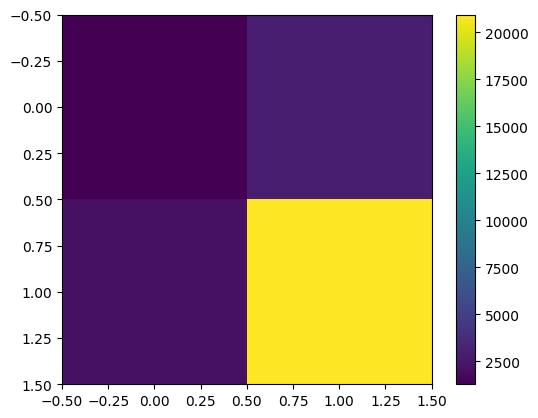

In [186]:
shw = plt.imshow(confusion_2_class)
bar = plt.colorbar(shw)

In [187]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.8127492955684854

lower than the baseline (0.9219343235862253)! BEWARE

what about the confusion matrix between the afinn score and the new score?

In [188]:
confusion = pd.crosstab(np.sign(df.afinn - 3), np.sign(df.myscore))
confusion_2_class = confusion.iloc[[0, 2], [0, 2]]
confusion_2_class

myscore,-1,1
afinn,,
-1.0,2209,4417
1.0,1321,19182


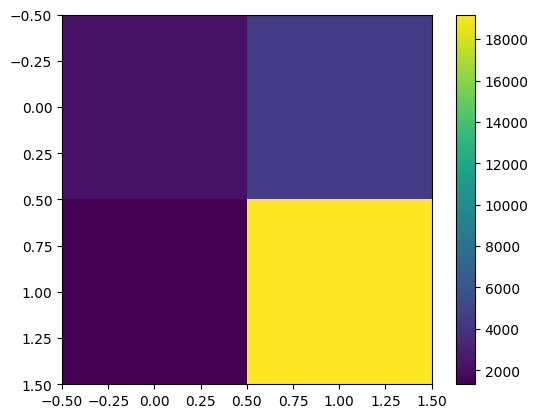

In [189]:
shw = plt.imshow(confusion_2_class)
bar = plt.colorbar(shw)

In [190]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.7884920196100115

## Feature Engeneering and classification


In [232]:
from sklearn.model_selection import train_test_split
#Step 1: train-test split
X = df.text
#the column text contains textual data to extract features from.
y = df.score
#this is the column we are learning to predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#split X and y into training and testing sets. By default, it splits 75% training and 25% test. random_state=1 for reproducibility.

In [233]:
from sklearn.feature_extraction.text import CountVectorizer

#Step 2-3: Pre-process and Vectorize train and test data
vect = CountVectorizer(stop_words=None, lowercase=True, max_features=5000)
#clean is a function we defined for pre-processing, seen in the notebook.
X_train_dtm = vect.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_dtm = vect.transform(X_test.apply(lambda x: " ".join(x)))
print(X_train_dtm.shape, X_test_dtm.shape)

(26379, 5000) (8793, 5000)


### Balacig Data

https://imbalanced-learn.org/stable/

In [234]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


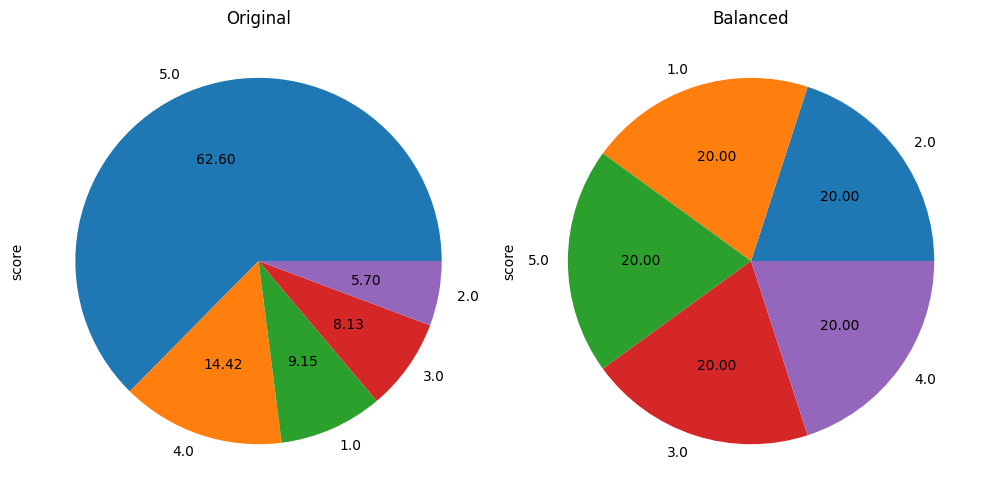

In [235]:
sampling_strategy = "not majority"
autopct = "%.2f"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
df.score.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")

ROS = RandomOverSampler(sampling_strategy=sampling_strategy)
X_train_ros, y_train_ros = ROS.fit_resample(X_train_dtm, y_train)
y_train_ros.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("Balanced")
fig.tight_layout()

In [236]:
y_train_ros.value_counts()

2.0    16495
1.0    16495
5.0    16495
3.0    16495
4.0    16495
Name: score, dtype: int64

In [237]:
df.score.value_counts()

5.0    22017
4.0     5071
1.0     3218
3.0     2860
2.0     2006
Name: score, dtype: int64

In [238]:
def analisys(y_test, y_pred_class):
  print("\n Accuracy: ", accuracy_score(y_test, y_pred_class))
  print("Report: \n",classification_report(y_test, y_pred_class))

  cm = confusion_matrix(y_test, y_pred_class)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=[1,2,3,4,5])

  disp.plot()

  plt.show()

### Naive Bayes Classifier


Accuracy:  0.5809166382349596
Report:                precision    recall  f1-score   support

         1.0       0.41      0.56      0.47       806
         2.0       0.21      0.32      0.25       502
         3.0       0.23      0.34      0.27       697
         4.0       0.29      0.35      0.32      1266
         5.0       0.87      0.69      0.77      5522

    accuracy                           0.58      8793
   macro avg       0.40      0.45      0.42      8793
weighted avg       0.66      0.58      0.61      8793



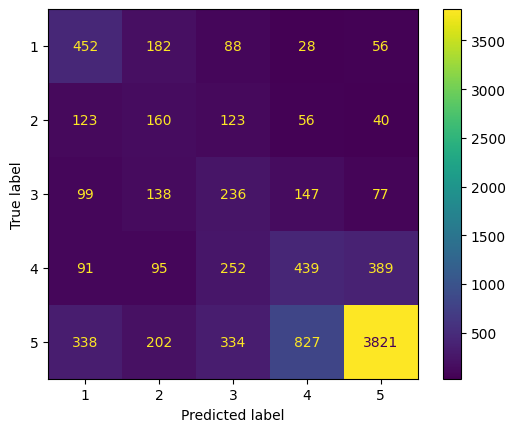

In [227]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes classifier
nb.fit(X_train_ros, y_train_ros)#train the mode
y_pred_class = nb.predict(X_test_dtm)#make class predictions for test data
analisys(y_test, y_pred_class)

### Logistic Regression


Accuracy:  0.58364608211077
Report:                precision    recall  f1-score   support

         1.0       0.48      0.56      0.52       806
         2.0       0.23      0.34      0.28       502
         3.0       0.24      0.34      0.28       697
         4.0       0.27      0.36      0.31      1266
         5.0       0.86      0.69      0.77      5522

    accuracy                           0.58      8793
   macro avg       0.42      0.46      0.43      8793
weighted avg       0.65      0.58      0.61      8793



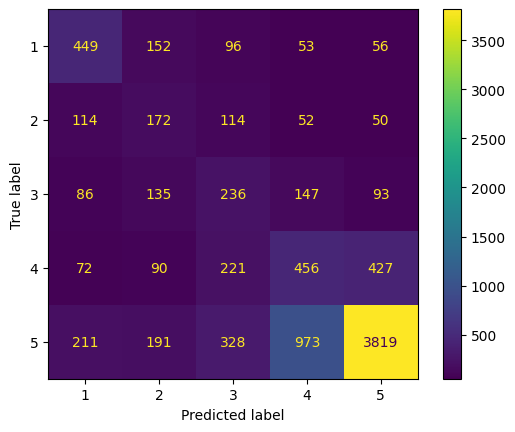

In [228]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_ros, y_train_ros)
y_pred_class = logreg.predict(X_test_dtm)
analisys(y_test, y_pred_class)

### Support Vector Machine



 Accuracy:  0.6275446377800523
Report: 
               precision    recall  f1-score   support

         1.0       0.52      0.54      0.53       806
         2.0       0.22      0.29      0.25       502
         3.0       0.25      0.33      0.28       697
         4.0       0.32      0.30      0.31      1266
         5.0       0.83      0.78      0.81      5522

    accuracy                           0.63      8793
   macro avg       0.43      0.45      0.44      8793
weighted avg       0.65      0.63      0.64      8793



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


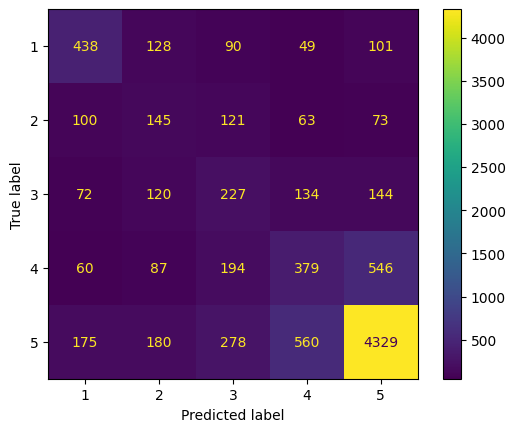

In [239]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(class_weight='balanced') #notice the “balanced” option
classifier.fit(X_train_dtm, y_train) #fit the model with training data
y_pred_class = classifier.predict(X_test_dtm)
analisys(y_test, y_pred_class)